## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
lr=[1e-1,1e-2,1e-3,1e-4,1e-5]
epochs=50
batch_size=256
momentum=0.95

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l in lr:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (l))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=l, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=epochs, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(l)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.8287 - acc: 0.3485 - val_loss: 1.7190 - val_acc: 0.3732
Epoch 2/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.6005 - acc: 0.4330 - val_loss: 1.5880 - val_acc: 0.4297
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5136 - acc: 0.4639 - val_loss: 1.5347 - val_acc: 0.4545
Epoch 4/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4503 - acc: 0.4842 - val_loss: 1.5178 - val_acc: 0.4567
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4069 - acc: 0.5000 - val_loss: 1.4858 - val_acc: 0.4765
Epoch 6/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.3653 - acc: 0.5167 - val_loss: 1.4803 - val_acc: 0.4702
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.3220 - acc: 0.5297 - val_loss: 1.

Epoch 28/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.0323 - acc: 0.2952 - val_loss: 2.0309 - val_acc: 0.2961
Epoch 29/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9812 - acc: 0.3112 - val_loss: 1.9809 - val_acc: 0.3124
Epoch 38/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.9762 - acc: 0.3122 - val_loss: 1.9761 - val_acc: 0.3169
Epoch 39/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.9713 - acc: 0.3153 - val_loss: 1.9713 - val_acc: 0.3163
Epoch 40/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.9666 - acc: 0.3169 - val_loss: 1.9668 - val_acc: 0.3178
Epoch 41/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.9620 - acc: 0.3184 - val_loss: 1.9623 - val_acc: 0.3196
Epoch 42/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.9576 - acc: 0.3188 - val_loss: 1.9580 - val_acc: 0.3200
Epoch 43/50
50000/50

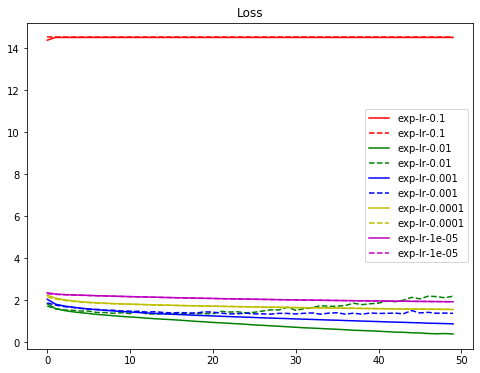

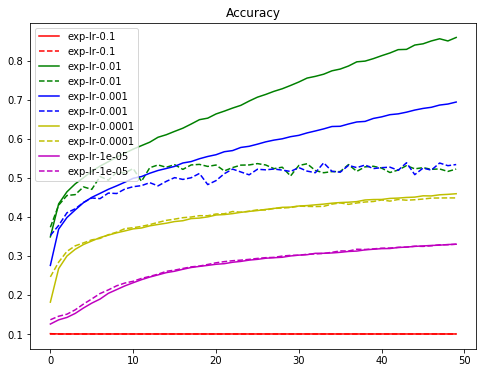

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()